
___
Team Member Names
- Name 1: Matthew D. Cusack
- Name 2: Tim Cabaza
- Name 3: Amy Adyanthaya

<a id="top"></a>
________
# Clustering
____

## Contents
* <a href="#Imports">Dependency and Data Imports</a>
* <a href="#DataPrep">Data Preparation</a>
* <a href="#BusinessUnderstanding">Business Understanding</a>
* <a href="#DataUnderstanding">Data Understanding</a>
* <a href="#ModelEval">Modeling and Evaluation</a>
    * <a href="#OptionA">Option A: Cluster Analysis</a>
    * <a href="#OptionB">Option B: Association Rule Mining</a>
    * <a href="#OptionC">Option C: Collaborative Filtering</a>
* <a href="#Deployment">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>
_______

___
___
<a href="#top">Back to Top</a>
<a id="Imports"></a>
## Imports

In [14]:
# Load Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this import allows you to standardize your data, scaling so that all features have a mean of zero and a standard deviation of 1. 
from sklearn.preprocessing import StandardScaler

# for option A: Clustering methods
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

# for option B: association rule mining
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

# for option C:
# import graphlab as gl


In [2]:
# file path
file_path = "../1 - Visualization and Data Preprocessing/Data/ONPClean2.csv" # previously cleaned
# file_path = '../1 - Visualization and Data Preprocessing/Data/OnlineNewsPopularity.csv' # unclean

# Load the dataset
df = pd.read_csv(file_path)

# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)
df.head()

,url_name,date,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_shares,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,amazon-instant-video-browser/,2013-01-07,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,6.386879,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
1,reeddit-reddit/,2013-01-07,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,7.170888,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
2,rage-comics-dying/,2013-01-07,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,7.003974,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,power-matters-alliance-organization/,2013-01-07,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,7.378384,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
4,polaroid-android-camera/,2013-01-07,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.783641,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


___
___
<a href="#top">Back to Top</a>
<a id="DataPrep"></a>
## Data Preperation
To Do:

    Remove Outliers
    Scale Data
    Remove non-independent variables

In [3]:
# drop certain columns
df1 = df.drop('url_name', axis=1) # was a string and not helpful
df1 = df1.drop('date', axis=1) # datetime change didn't work.
df1 = df1.drop('log_shares', axis=1) # not as useful

# Factor columns that need it for certain models
# Factor the `news_category` column for other two tasks.
df1 = pd.get_dummies(df1, columns=['news_category'], drop_first=False)

# Factor the `day_of_week` column for other two tasks.
df1 = pd.get_dummies(df1, columns=['day_of_week'], drop_first=False)

# drop Na's
df1.dropna()

df1.head()

,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,year,month,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess,news_category_Business,news_category_Entertainment,news_category_Lifestyle,news_category_Social_Media,news_category_Tech,news_category_Uncategorized,news_category_World_News,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,2013,1,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,2013,1,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,2013,1,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,2013,1,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,2013,1,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [4]:
# # Scale the features in the training and testing sets using standard scalar.
scaler = StandardScaler()

df1_std = scaler.fit_transform(df1)

___

___
___
<a href="#top">Back to Top</a>
<a id="BusinessUnderstanding"></a>
## Business Understanding (10 points).
    Describe the purpose of the data set you selected (i.e., why was this data
    collected in the first place?). 
    
    How will you measure the effectiveness of a good algorithm? 
    
    Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?


____
___
<a href="#top">Back to Top</a>
<a id="DataUnderstanding"></a>
## Data Understanding (20 points total)

    [10 points]
        Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 
    
        Verify data quality: 
            Are there missing values? 
            Duplicate data? Outliers? 
            Are those mistakes? 
            How do you deal with these problems?

    [10 points]
        Visualize the any important attributes appropriately.
        Important: Provide an interpretation for any charts or graphs.


___
___
<a href="#top">Back to Top</a>
<a id="ModelEval"></a>
## Modeling and Evaluation (50 points total)
    Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
    the data you have chosen and use visualizations of the results to explain the performance and
    expected outcomes whenever possible. Guide the reader through your analysis with plenty of
    discussion of the results.


___
<a href="#top">Back to Top</a>
<a id="OptionA"></a>

Option A: Cluster Analysis

    Perform cluster analysis using several clustering methods

    How did you determine a suitable number of clusters for each method?

    Use internal and/or external validation measures to describe and compare the
    clusterings and the clusters (some visual methods would be good).

    Describe your results. What findings are the most interesting and why?

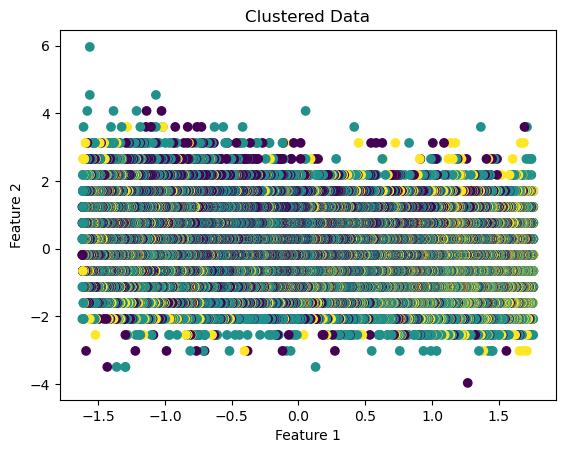

In [5]:
# Choose a clustering algorithm (kmeans)
kmeans = KMeans(n_clusters=3)

# Cluster the data
kmeans.fit(df1_std)

# Get the cluster labels
labels = kmeans.labels_

plt.scatter(df1_std[:, 0], df1_std[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data')
plt.show()


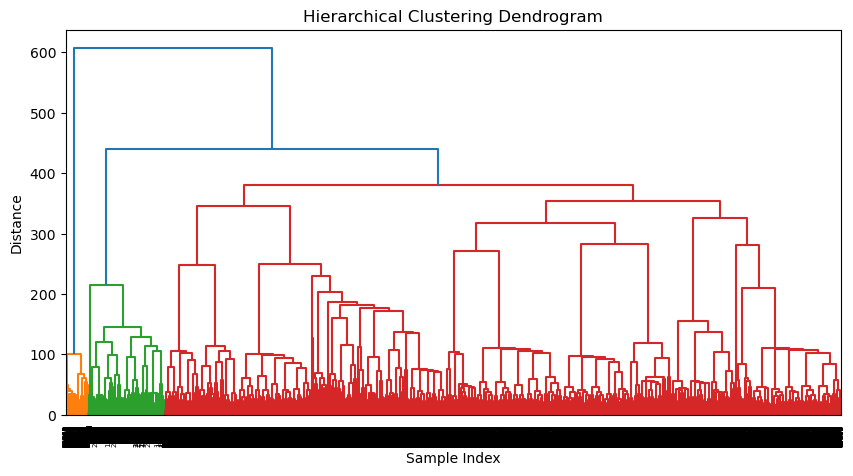

In [8]:
# Choose a clustering algorithm (Hierachical Clustering)

# Perform hierarchical clustering
linkage_matrix = linkage(df1_std, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

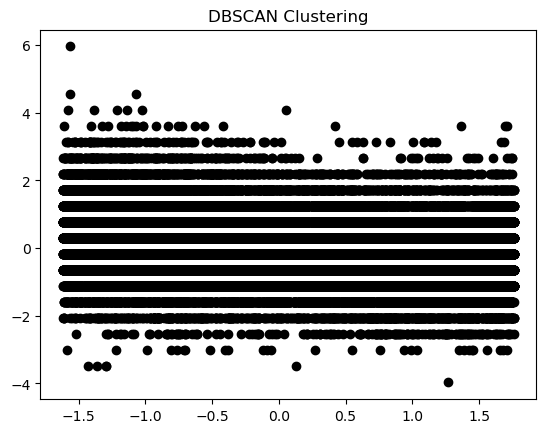

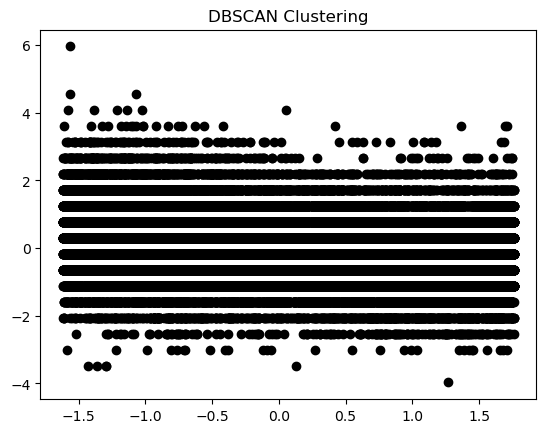

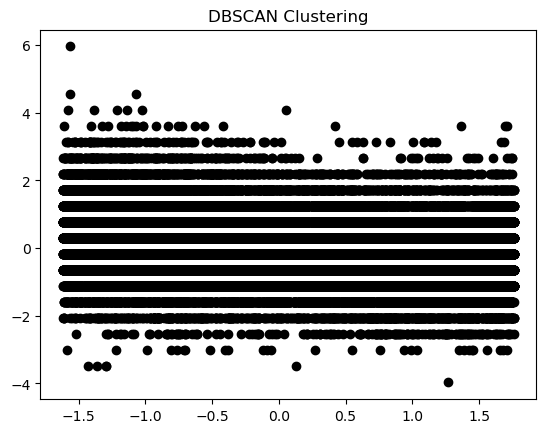

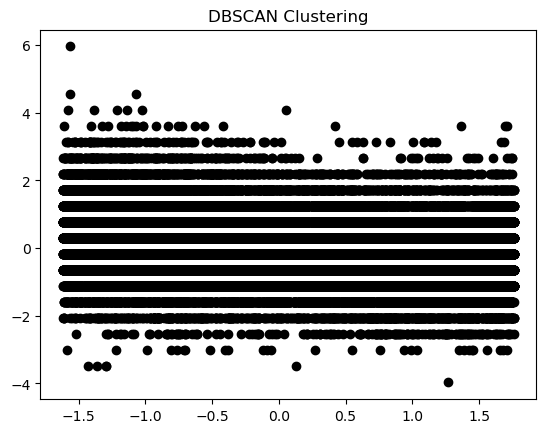

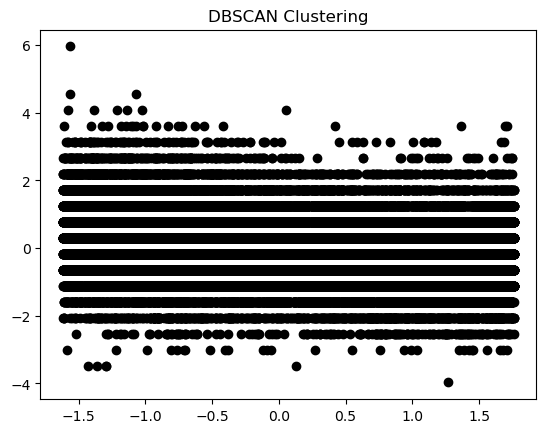

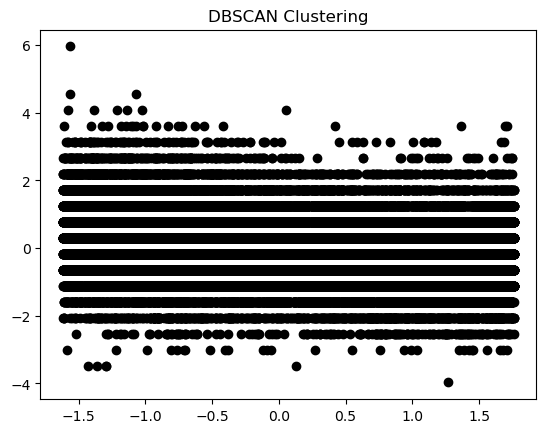

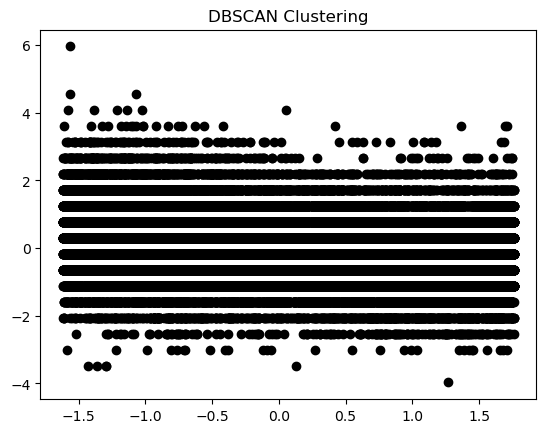

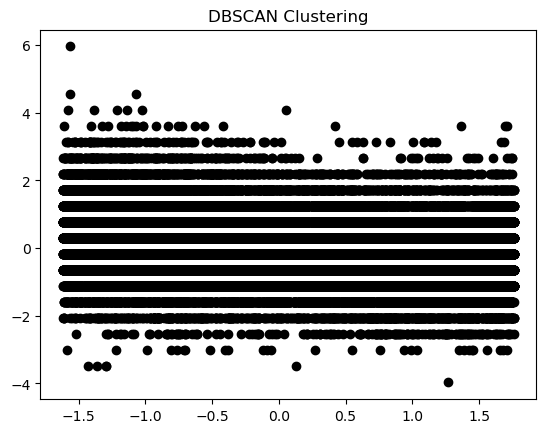

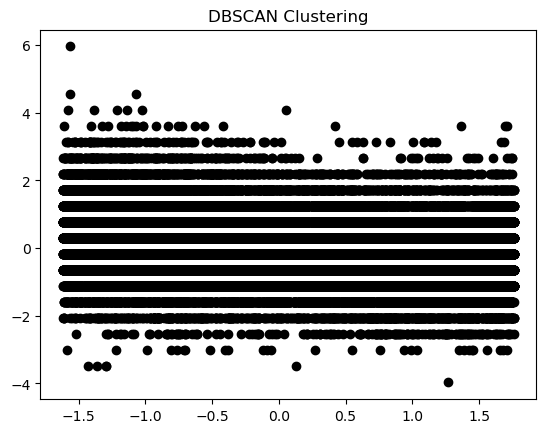

In [13]:
# Perform DBSCAN clustering with different parameter values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df1_std)
        

        # Extract cluster labels and core sample indices
        cluster_labels = dbscan.labels_
        core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True

        # Number of clusters in labels, ignoring noise if present
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        # Plot the clusters
        unique_labels = set(cluster_labels)
        colors = [plt.cm.Spectral(each)
                for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (cluster_labels == k)

            xy = df1_std[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=14)

            xy = df1_std[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=6)

        plt.title('DBSCAN Clustering')
        plt.show()

___
<a href="#top">Back to Top</a>
<a id="OptionB"></a>

Option B: Association Rule Mining

    Create frequent itemsets and association rules.

    Use tables/visualization to discuss the found results.

    Use several measure for evaluating how interesting different rules are.

    Describe your results. What findings are the most compelling and why?

In [ ]:
# # Using R

# # Load the data
# data <- df1_std

# # Create an association rules object
# arules <- apriori(data, minlen = 2, supp = 0.01, conf = 0.5)

# # Get the top 10 association rules
# top_rules <- arules[1:10]

# # Print the top 10 association rules
# print(top_rules)

NameError: name 'data' is not defined

___
<a href="#top">Back to Top</a>
<a id="OptionC"></a>

Option C: Collaborative Filtering

    Create user-item matrices or item-item matrices using collaborative filtering

    Determine performance of the recommendations using different performance measures
    and explain what each measure

    Use tables/visualization to discuss the found results. Explain each visualization in detail.

    Describe your results. What findings are the most compelling and why?

In [ ]:
# Create a user-item matrix
user_item_matrix = df1_std.pivot_table(values='rating', index='user_id', column='item_id', aggfunc='mean')

# Create a recommender system
recommender = gl.recommender.create(user_item_matrix, k=10)

# Get the top 10 recommendations for a user
recommendations = recommender.recommend(user_id=1, k=10)

# Print the top 10 recommendations
print(recommendations)

___
___
<a href="#top">Back to Top</a>
<a id="Deployment"></a>
## Deployment (10 points total)
    Be critical of your performance and tell the reader how you current model might be usable by
    other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?

    How useful is your model for interested parties (i.e., the companies or organizations
    that might want to use it)?

    How would your deploy your model for interested parties?

    What other data should be collected?

    How often would the model need to be updated, etc.?

___
___
<a href="#top">Back to Top</a>
<a id="Exceptional"></a>
## Exceptional Work (10 points total)
    You have free reign to provide additional analyses or combine analyses